# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Graficar las series, Analizar sus caracteristicas, Trasnformacion

-----

## Analisis Serie Reservas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [3]:
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,463
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472


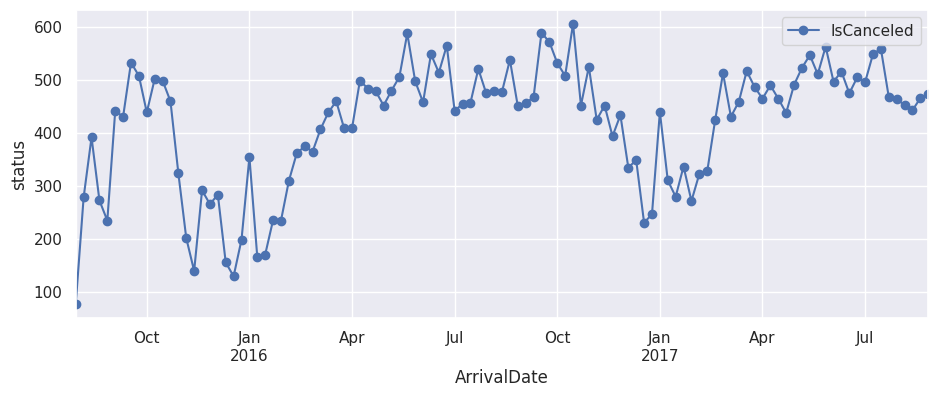

In [4]:
# Graficar las reservas
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('status');

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

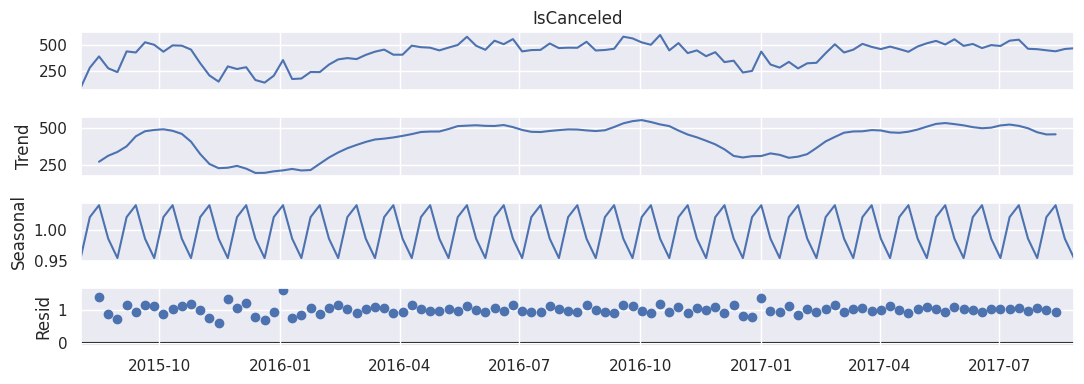

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_w_r['IsCanceled'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [7]:
 ## Calculamos la transformacion logarítmica

Realizar la transformación logarítmica ayuda a estabilizar la varianza y a efatizar los cambios relativos

In [8]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [9]:
# Apply Log Transformer

transformer = LogTransformer()
log_df_w_r = transformer.fit_transform(df_w_r)
log_df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-07-30,6.137727
2017-08-06,6.113682
2017-08-13,6.091310
2017-08-20,6.142037
2017-08-27,6.156979


Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

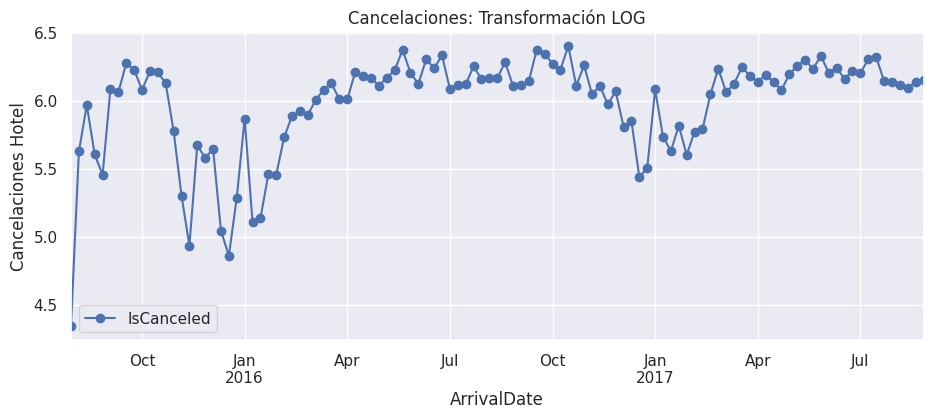

In [10]:
# Plot Log Data
ax = log_df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel')
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

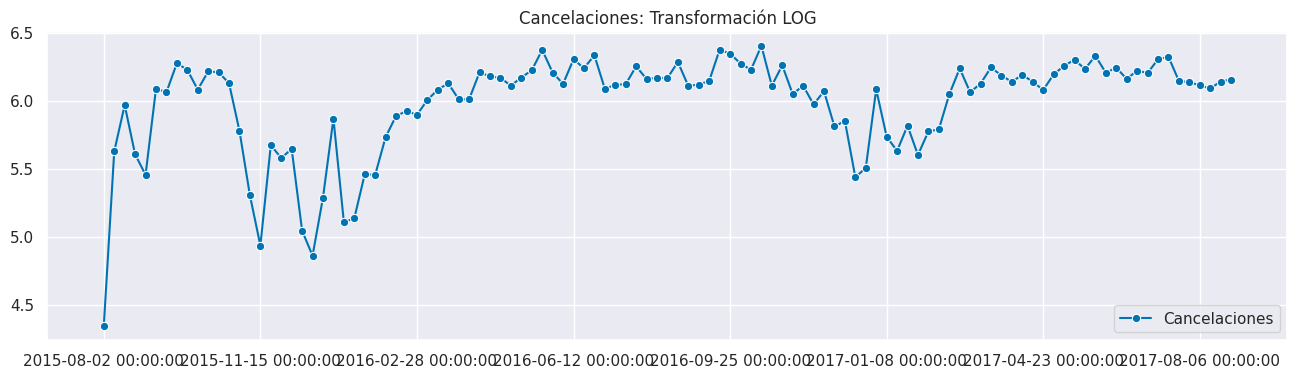

In [11]:
# Plot Log Data
from sktime.utils.plotting import plot_series
fig, ax =plot_series(log_df_w_r, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

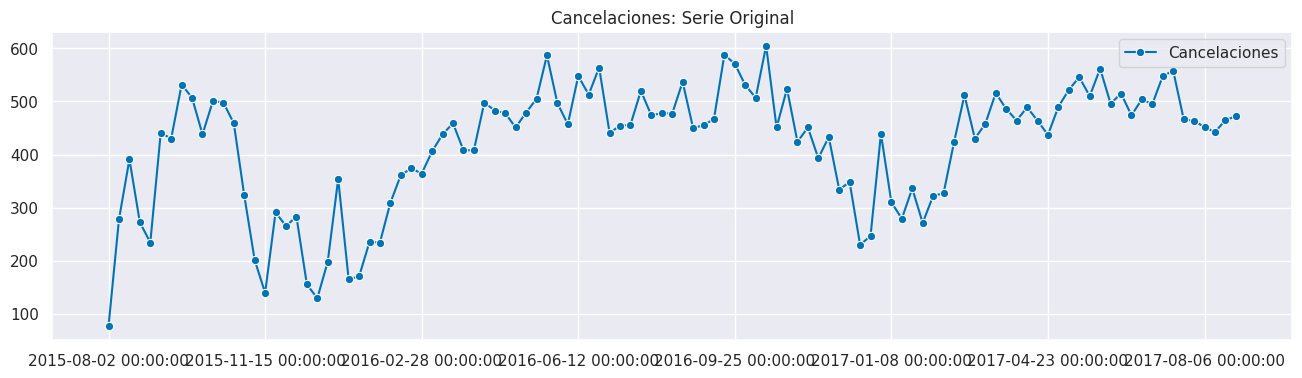

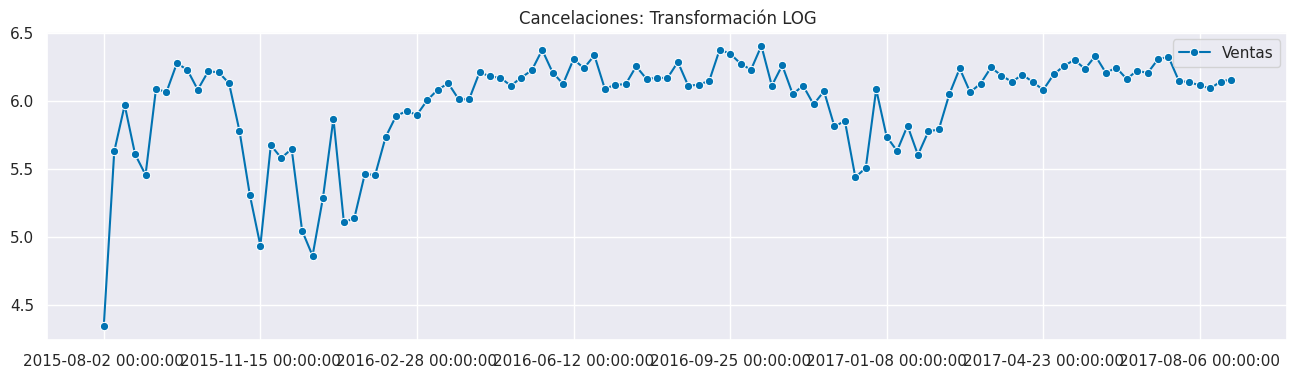

In [12]:
## Comparamos la transformacion logarítmica de la Serie Original y la Serie en Log
# Plot Log Data & Original Data
fig, ax =plot_series(df_w_r, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Serie Original')
fig, ax =plot_series(log_df_w_r, labels=["Ventas"])
ax.set_title('Cancelaciones: Transformación LOG')

### Vamos a calcular la correlacion de la serie en Log

In [13]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

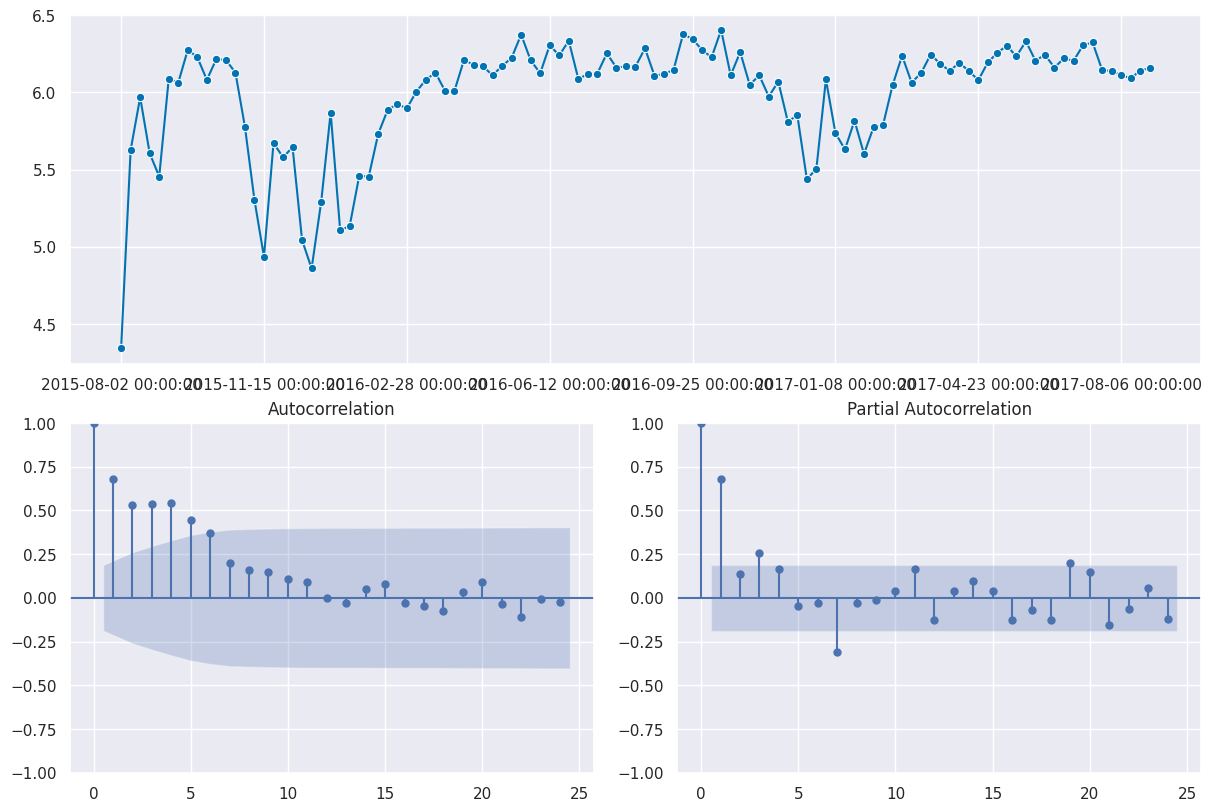

In [14]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_df_w_r)

Ahora, haremos una diferenciacion: La diferenciación es una técnica que se utiliza para hacer que una serie temporal sea estacionaria.

In [15]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

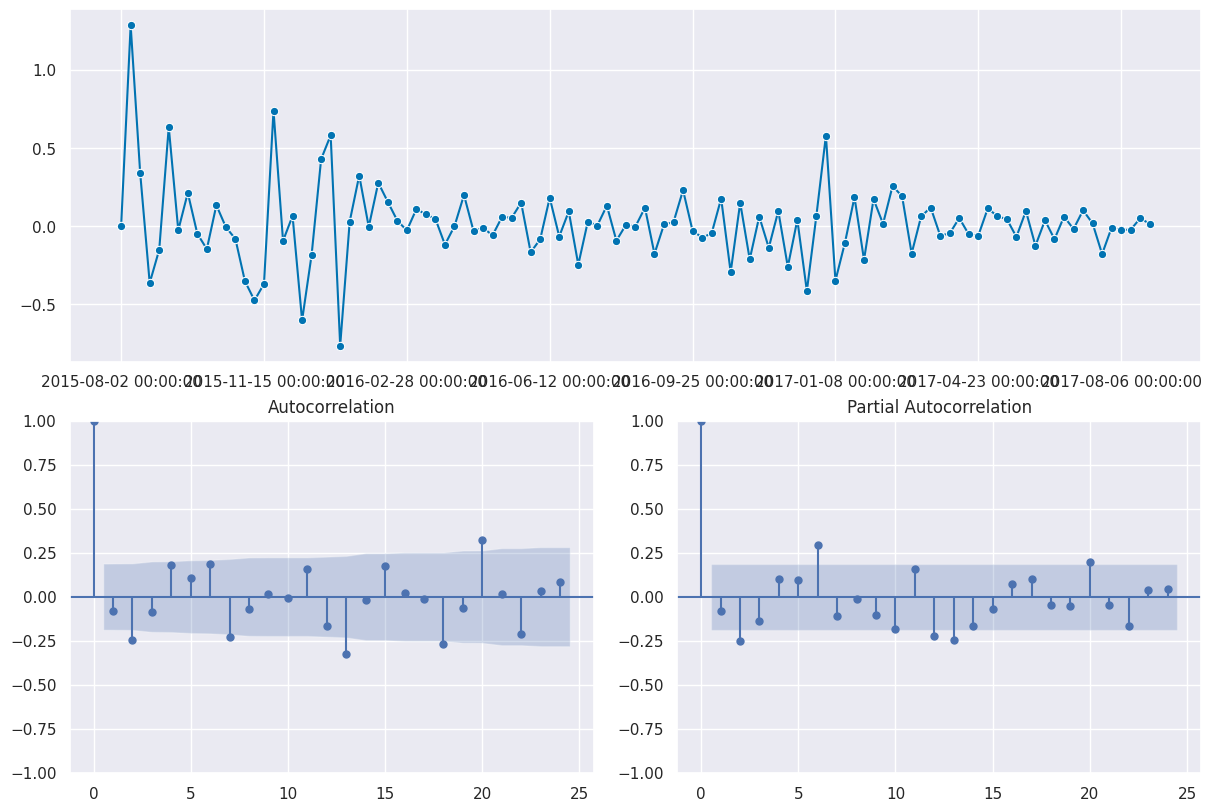

In [16]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_df_w_r))

Differencer es una clase o función que realiza la diferenciación, y estás especificando que se realice una diferenciación no estacional (d=1) con un lag de 1. De Lag 1, significa que se está diferenciando la serie temporal una vez sin tener en cuenta patrones estacionales

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

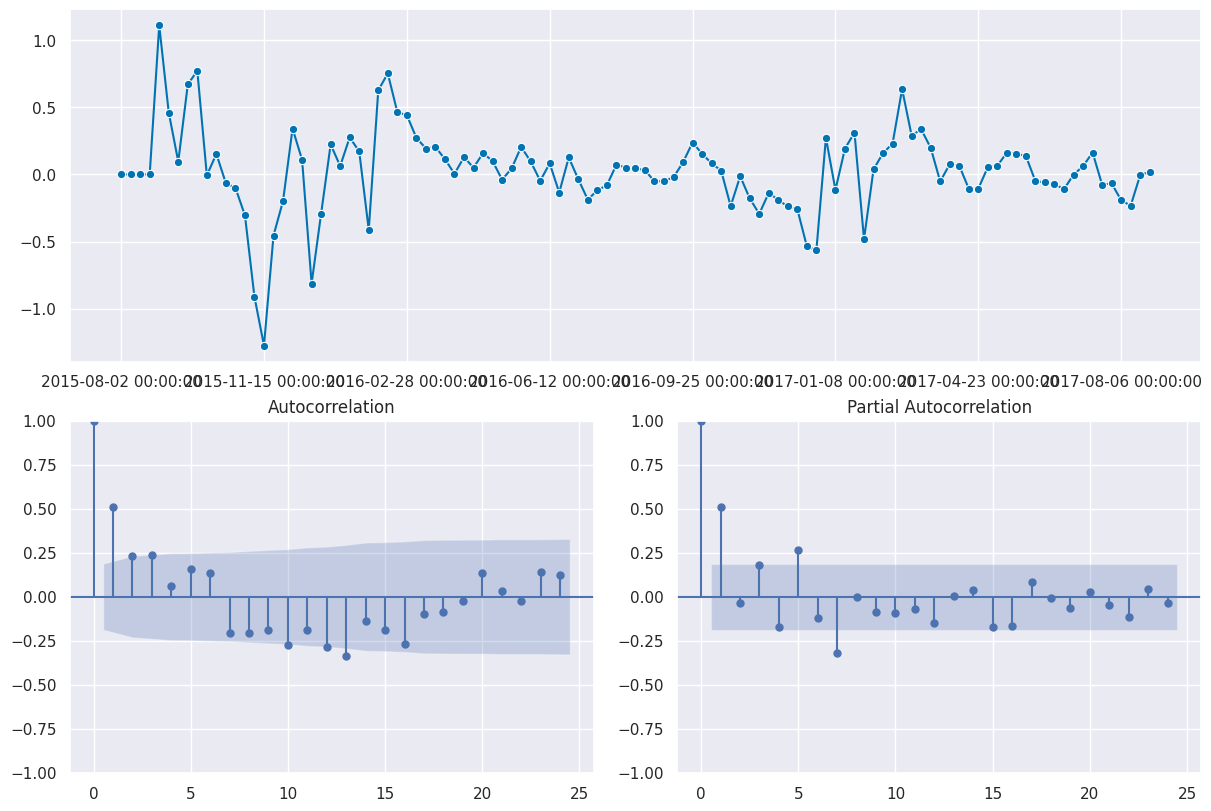

In [17]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_df_w_r))

La diferenciación estacional implica tomar la diferencia entre los valores de la serie temporal en el mismo punto en diferentes estaciones o períodos, y en este caso, el período es de 4 unidades de tiempo (en este caso, semanas).

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

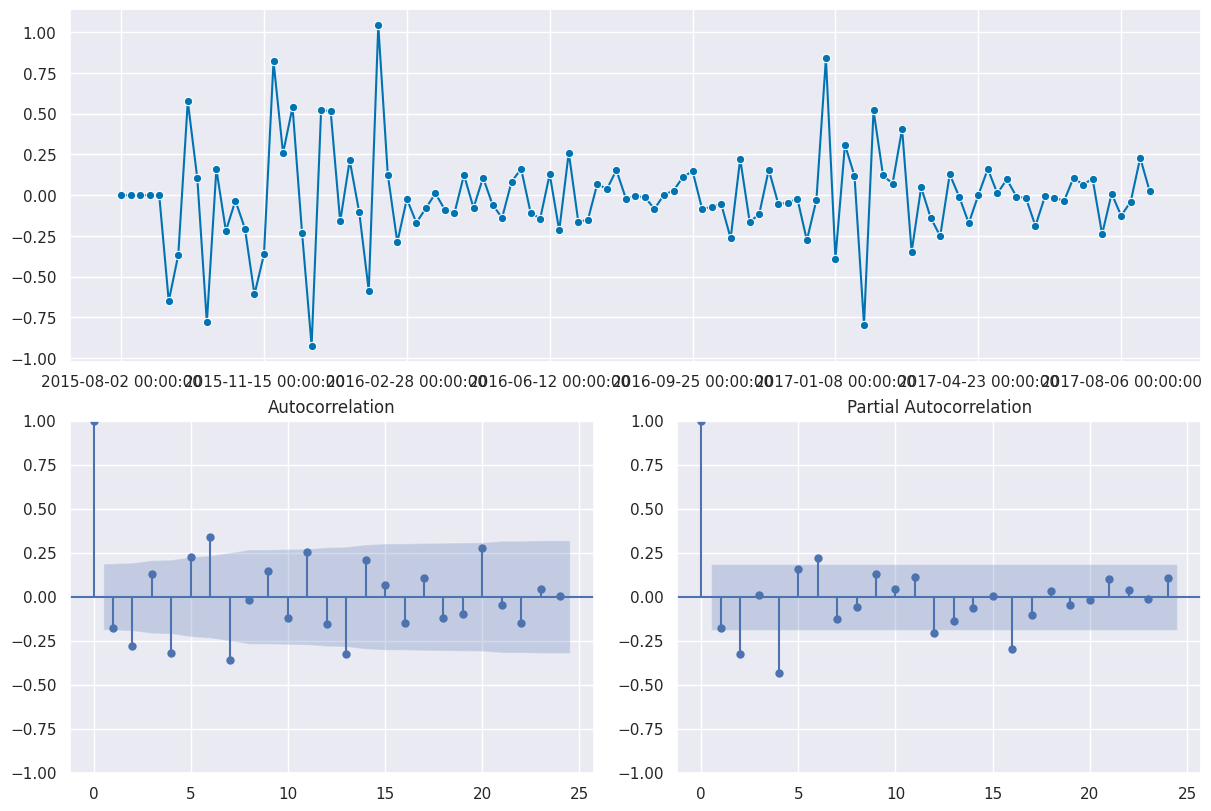

In [18]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_df_w_r))

Dos lags especificados: 1 y 4. Dos tipos de diferenciación:
Diferenciación no estacional (lags=[1]): Se tomará la diferencia entre cada valor y su valor  anterior.
Diferenciación estacional (lags=[4]): Se tomará la diferencia entre cada valor y su valor hace 4 períodos de tiempo (en este caso, semanas).

------

## Analisis Serie Cancelaciones

In [19]:
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-07-30,329
2017-08-06,251
2017-08-13,275
2017-08-20,332
2017-08-27,206


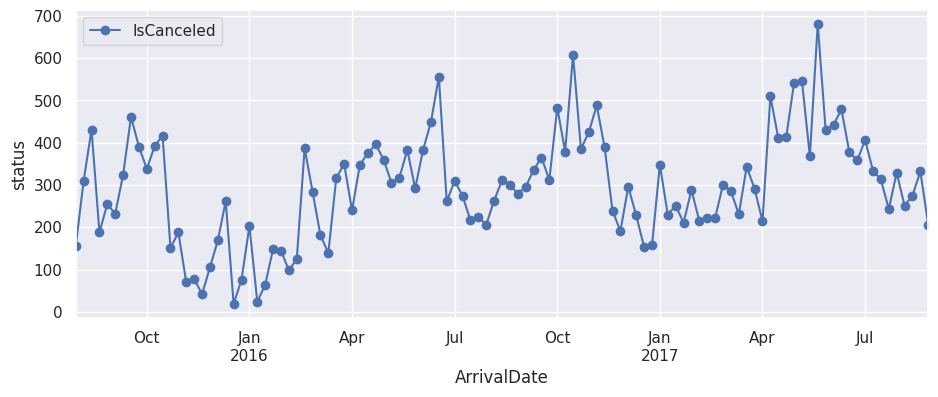

In [20]:
# Graficar las cancelaciones
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_c.plot(marker='o', linestyle='-')
ax.set_ylabel('status');

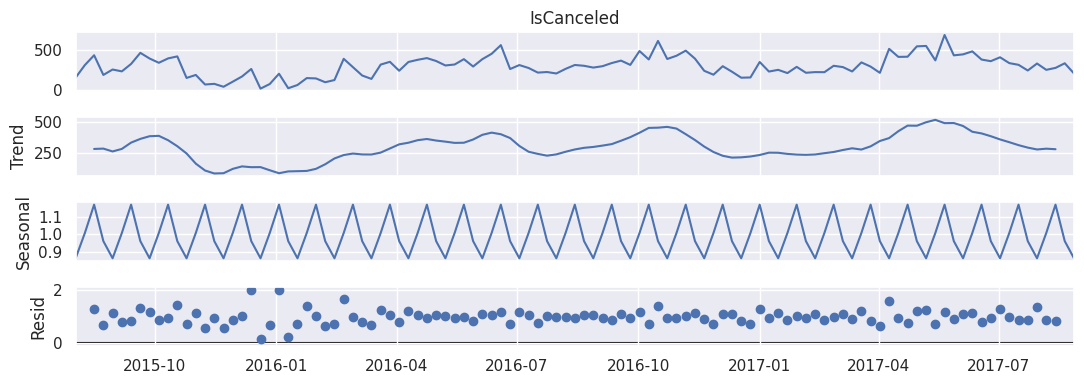

In [21]:
decomposition = seasonal_decompose(df_w_c['IsCanceled'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

In [22]:
 ## Calculamos la transformacion logarítmica

Realizar la transformación logarítmica ayuda a estabilizar la varianza y a efatizar los cambios relativos

In [23]:
# Apply Log Transformer

transformer = LogTransformer()
log_df_w_c = transformer.fit_transform(df_w_c)
log_df_w_c.tail()

,IsCanceled
ArrivalDate,
2017-07-30,5.796058
2017-08-06,5.525453
2017-08-13,5.616771
2017-08-20,5.805135
2017-08-27,5.327876


Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

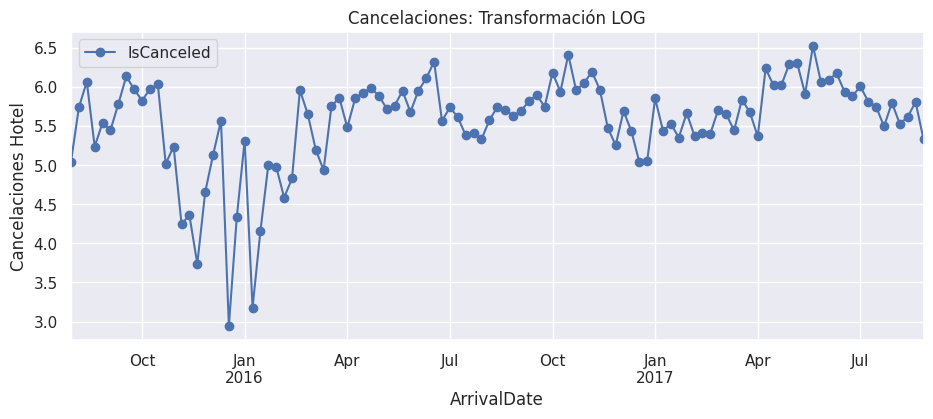

In [24]:
# Plot Log Data
ax = log_df_w_c.plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones Hotel')
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

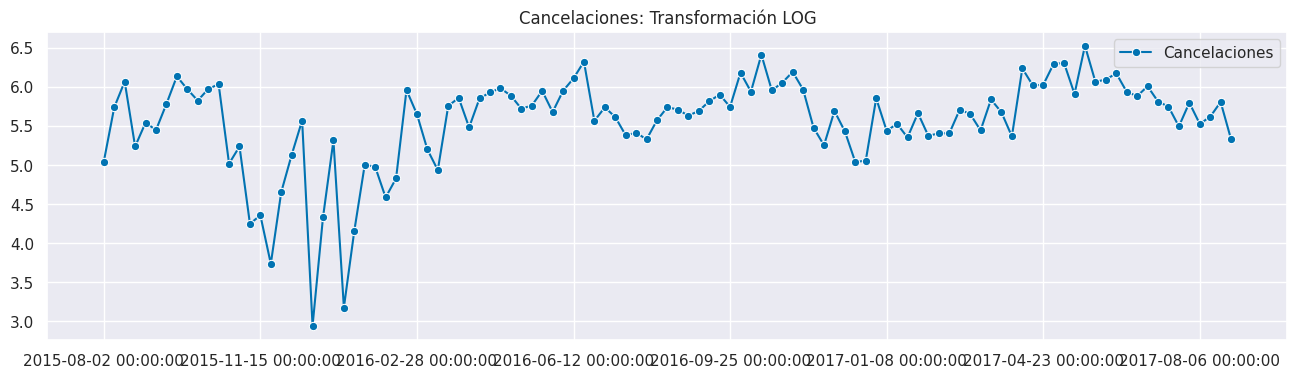

In [25]:
# Plot Log Data
fig, ax =plot_series(log_df_w_c, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Transformación LOG')

Text(0.5, 1.0, 'Cancelaciones: Transformación LOG')

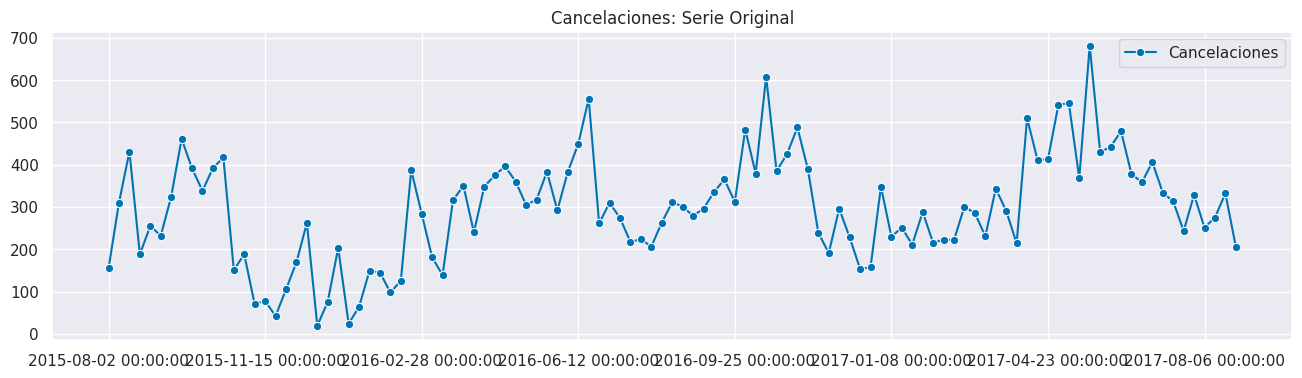

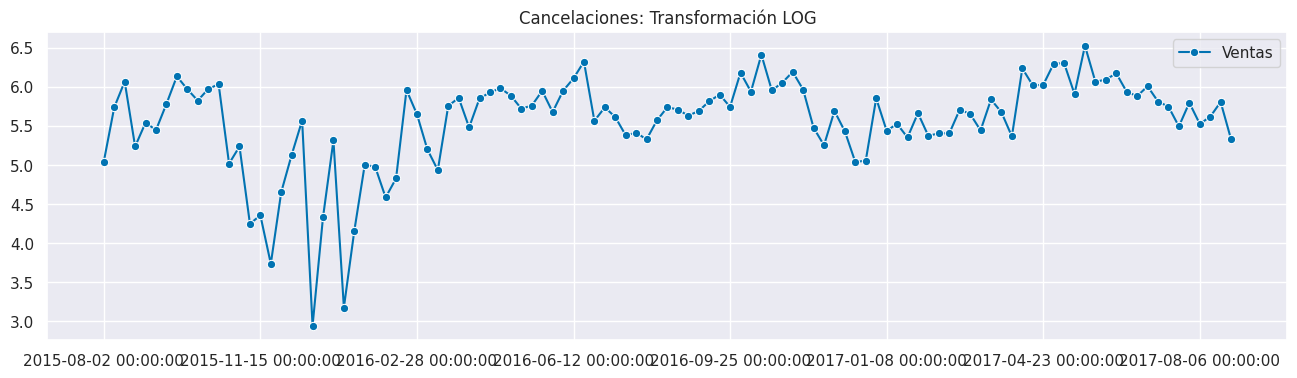

In [26]:
## Comparamos la transformacion logarítmica de la Serie Original y la Serie en Log
# Plot Log Data & Original Data
fig, ax =plot_series(df_w_c, labels=["Cancelaciones"])
ax.set_title('Cancelaciones: Serie Original')
fig, ax =plot_series(log_df_w_c, labels=["Ventas"])
ax.set_title('Cancelaciones: Transformación LOG')

### Vamos a calcular la correlacion de la serie en Log

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

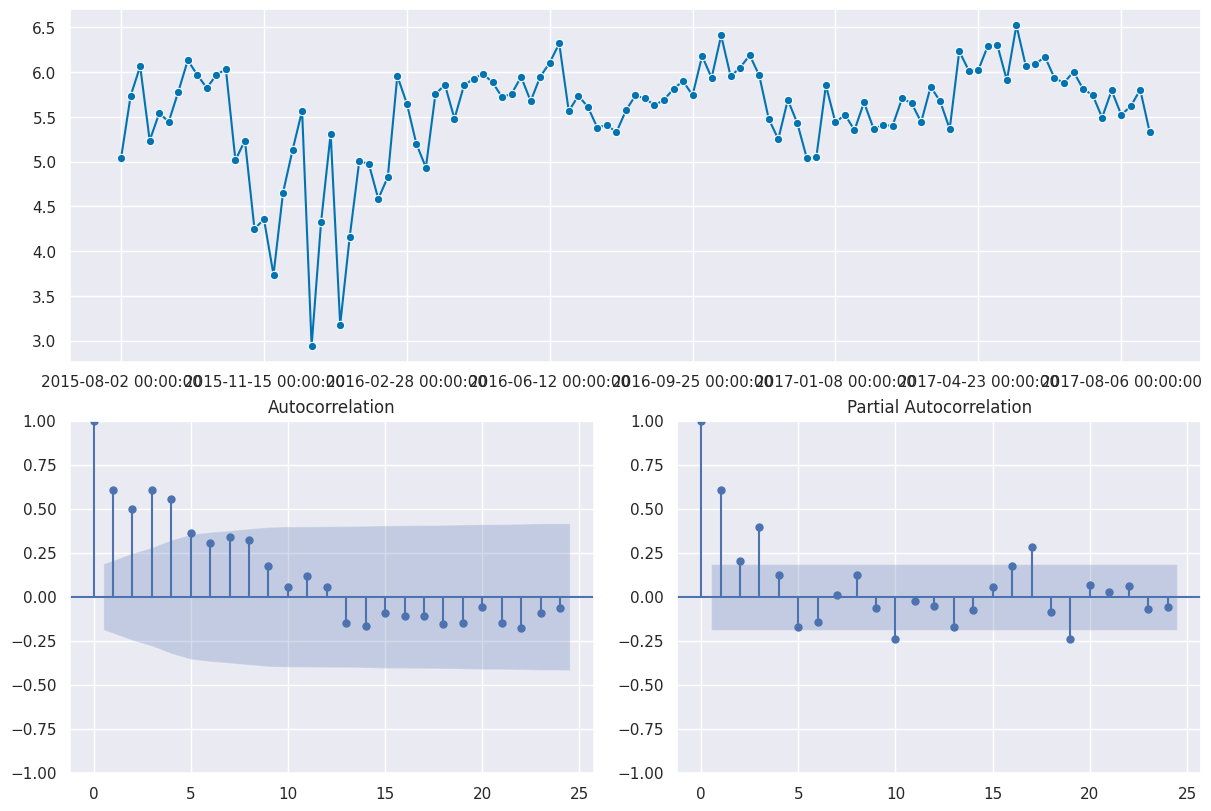

In [27]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_df_w_c)

Ahora, haremos una diferenciacion: La diferenciación es una técnica que se utiliza para hacer que una serie temporal sea estacionaria.

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

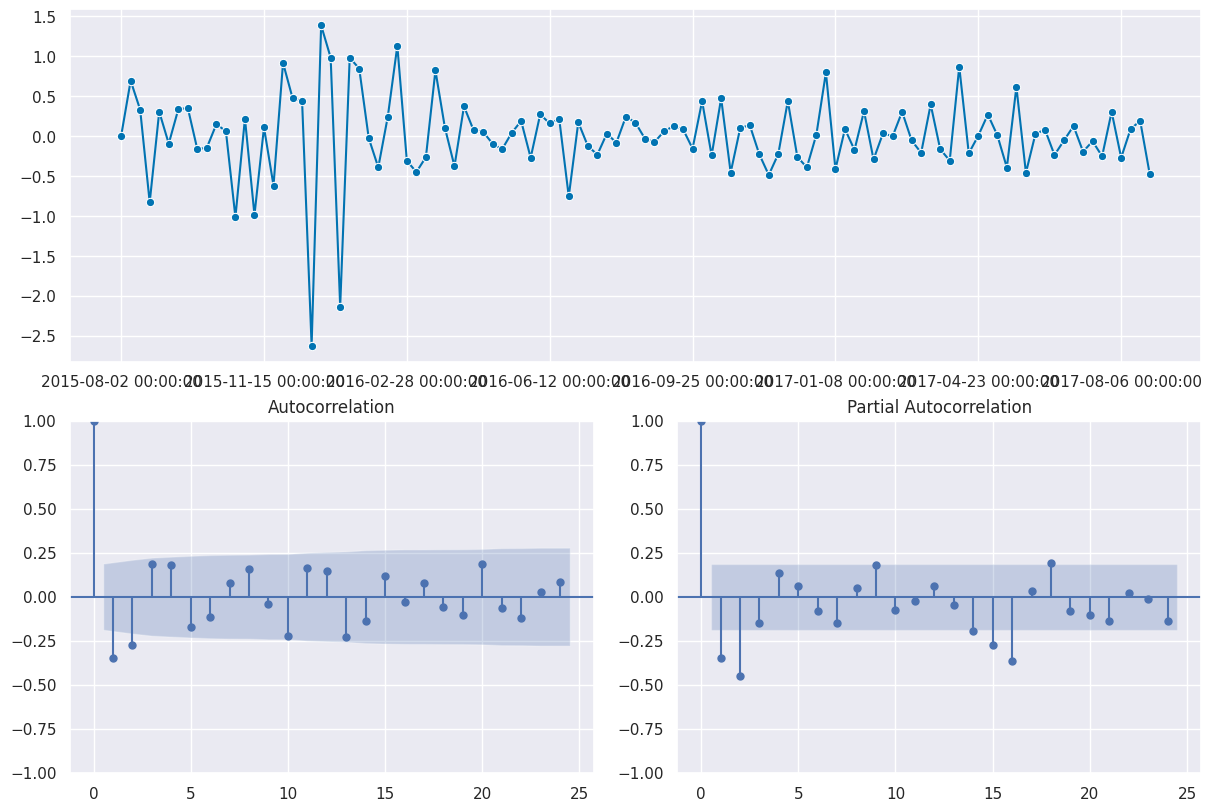

In [28]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_df_w_c))

Differencer es una clase o función que realiza la diferenciación, y estás especificando que se realice una diferenciación no estacional (d=1) con un lag de 1. De Lag 1, significa que se está diferenciando la serie temporal una vez sin tener en cuenta patrones estacionales

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

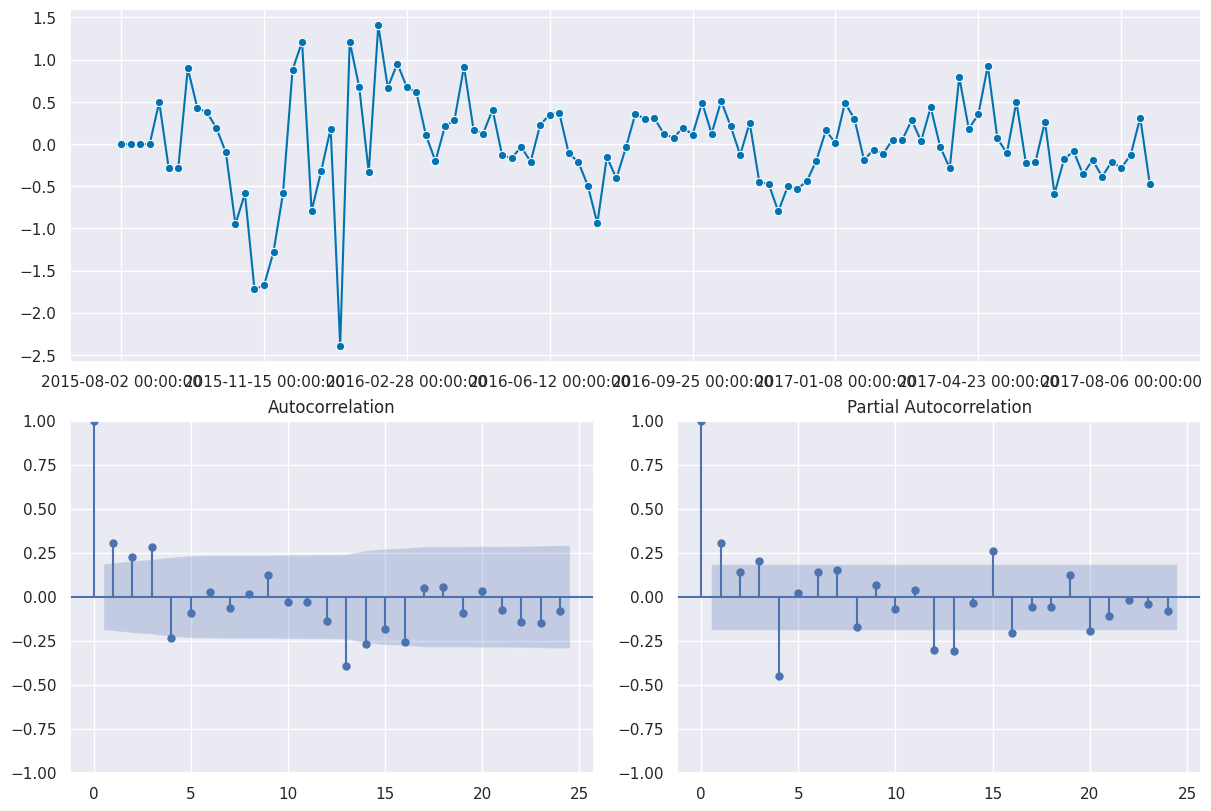

In [29]:
# Autocorrelation Fuction
# d=0; D=1; S=4
# 
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_df_w_c))

La diferenciación estacional implica tomar la diferencia entre los valores de la serie temporal en el mismo punto en diferentes estaciones o períodos, y en este caso, el período es de 4 unidades de tiempo (en este caso, semanas).

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

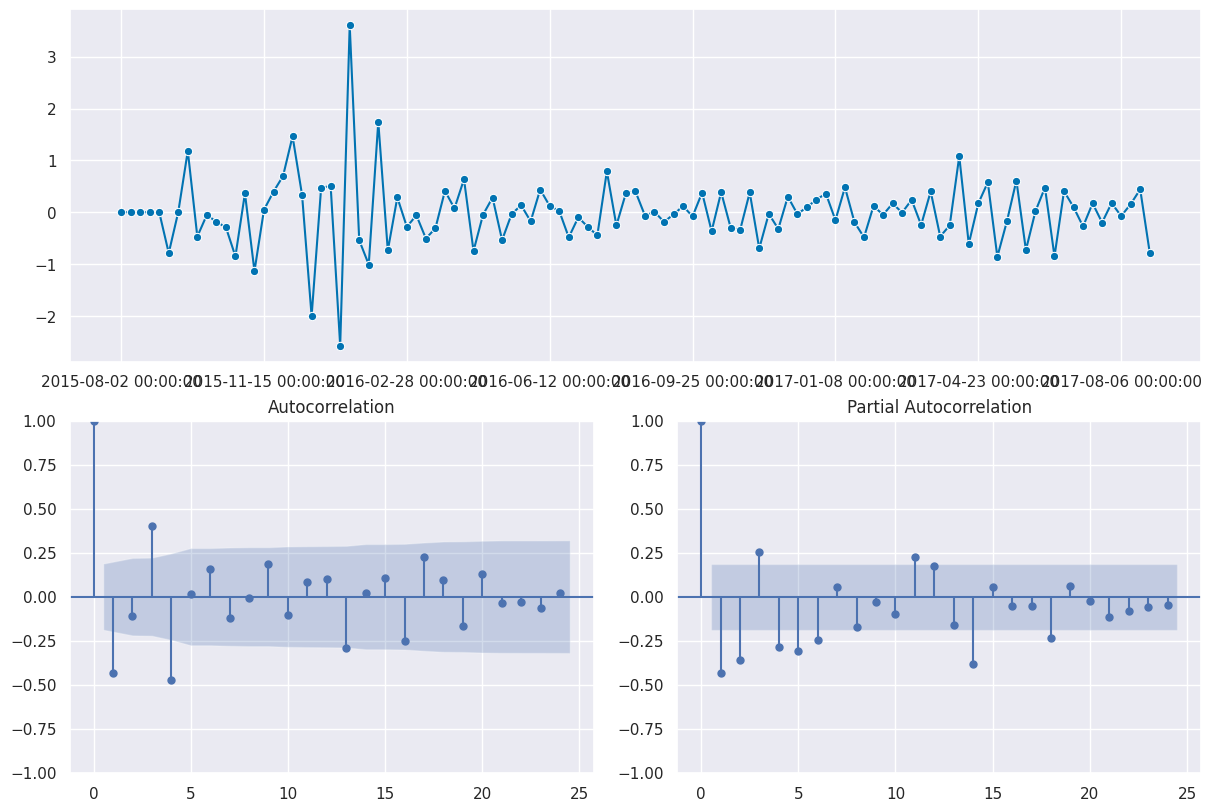

In [30]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_df_w_c))

Dos lags especificados: 1 y 4. Dos tipos de diferenciación:
Diferenciación no estacional (lags=[1]): Se tomará la diferencia entre cada valor y su valor  anterior.
Diferenciación estacional (lags=[4]): Se tomará la diferencia entre cada valor y su valor hace 4 períodos de tiempo (en este caso, semanas).

In [31]:
# Guardar el DataFrame de reservas LOG en un archivo CSV
log_df_w_r.to_csv('df_reservas_LOG.csv')

In [32]:
# Guardar el DataFrame de cancelaciones LOG en un archivo CSV
log_df_w_c.to_csv('df_cancelaciones_LOG.csv')

-----